In [1]:
import numpy as np
from qutip import *
import matplotlib.pyplot as plt
import matplotlib as mpl
from jc_model import *
%matplotlib inline

# Minggu ke-3 Bulan Maret

**Tujuan:**
- Melihat pengaruh frekuensi medan ($\omega$)

In [2]:
wa = 1.0*2*np.pi # frekuensi eksitasi atom
wc_list = [0.1*wa, 0.5*wa, 1.0*wa, 1.5*wa, 2.0*wa]  # List dari frekuensi medan
N = 15 
use_rwa = False
g_list = np.linspace(0, 5, 50)*wa # Kuat interaksi

#oprator
a = tensor(destroy(N), qeye(2))  #operator a
sm = tensor(qeye(N), destroy(2)) #operator sigma-minus

# Inisiasi list psi & E
psi_list = []
E_list = np.zeros([len(wc_list), len(g_list)])

## Melihat Pengaruhnya Terhadap Energi Sistem 

In [3]:

for i, wc in enumerate(wc_list):
    for j, g in enumerate(g_list):
        # Hitung Hamiltonian
        H = Hamiltonian(omega_a=wa, omega_m=wc, g=g, n=N, a=a, sm=sm, rwa=use_rwa)
        # menghitung ground state & energinya
        gnd_energy, gnd_state = H.groundstate() 
        psi_list.append(gnd_state)
        E_list[i,j] = gnd_energy/(wa)


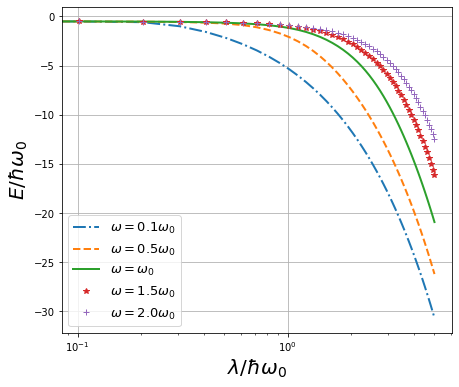

In [4]:
# Plot energi sistem
fig, axes = plt.subplots(1, 1, sharex=True, figsize=(7,6))
#axes.set(xlim=(0, 5.1), ylim=(-32, 0))
axes.semilogx(g_list/wa, E_list[0], '-.', linewidth=2, label=r"$\omega=0.1\omega_{0}$")
axes.semilogx(g_list/wa, E_list[1], '--', linewidth=2, label=r"$\omega=0.5\omega_{0}$")
axes.semilogx(g_list/wa, E_list[2], '-', linewidth=2, label=r"$\omega=\omega_{0}$")
axes.semilogx(g_list/wa, E_list[3], '*', linewidth=2, label=r"$\omega=1.5\omega_{0}$")
axes.semilogx(g_list/wa, E_list[4], '+', linewidth=2, label=r"$\omega=2.0\omega_{0}$")
axes.legend(loc=0,  fontsize=13)
axes.set_xlabel(r'$\lambda/\hbar\omega_{0}$', fontsize=20)
axes.set_ylabel(r'$E/\hbar\omega_{0}$', fontsize=20)
axes.grid()
#plt.savefig('Plot_Energi_g_frekuensi medan.pdf')  

In [5]:
E_list[1]

array([ -0.5       ,  -0.50700664,  -0.52884993,  -0.56834979,
        -0.63156841,  -0.73022251,  -0.88263083,  -1.10314887,
        -1.38848076,  -1.72789457,  -2.1145997 ,  -2.54525658,
        -3.0170792 ,  -3.5258408 ,  -4.06547021,  -4.62923993,
        -5.21113492,  -5.80645381,  -6.41176027,  -7.02460123,
        -7.64322552,  -8.26636866,  -8.89310274,  -9.52273488,
       -10.1547387 , -10.7887078 , -11.42432372, -12.06133345,
       -12.69953351, -13.33875837, -13.97887199, -14.61976155,
       -15.26133265, -15.9035057 , -16.54621312, -17.18939714,
       -17.83300807, -18.47700295, -19.12134443, -19.76599986,
       -20.41094061, -21.05614144, -21.70158002, -22.34723651,
       -22.99309323, -23.63913439, -24.28534579, -24.93171469,
       -25.57822958, -26.22488005])

## Melihat Pengaruhnya Fungsi Wigner

In [6]:
g_list = np.array([0.1, 0.2, 0.5, 1, 1.5, 2.0, 2.5])*2*np.pi

In [7]:
psi_list1 = []
for g in g_list:
    # Hamiltonian total
    H = Hamiltonian(omega_a=wa, omega_m=wc_list[0], g=g, n=N, a=a, sm=sm, rwa=use_rwa)
    gnd_energy, gnd_state = H.groundstate() 
    psi_list1.append(gnd_state)

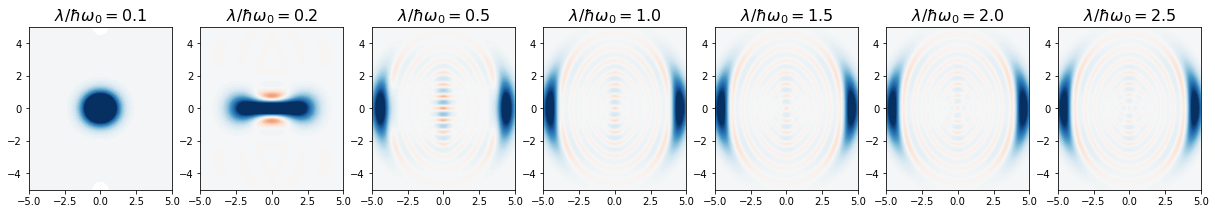

In [8]:
xvec = np.linspace(-5,5,200)
fig, axes = plt.subplots(1,len(g_list), sharex=True, figsize=(3*len(g_list),3))

for idx, psi in enumerate(psi_list1):
    # menghitung wigner function
    W = Wigner(psi=psi, xvec=xvec, yvec=xvec)
    
    g_plot = g_list[idx]/(wa)
    # plot wigner function
    axes[idx].contourf(xvec, xvec, W, 100, norm=mpl.colors.Normalize(-.125,.125), cmap=plt.get_cmap('RdBu'))
    axes[idx].set_title(r"$\lambda/\hbar\omega_0 = %.1f$" % g_plot, fontsize=16)
    #plt.savefig('Plot_wigner_g_f1.pdf')

In [9]:
psi_list1 = []
for g in g_list:
    # Hamiltonian total
    H = Hamiltonian(omega_a=wa, omega_m=wc_list[1], g=g, n=N, a=a, sm=sm, rwa=use_rwa)
    gnd_energy, gnd_state = H.groundstate() 
    psi_list1.append(gnd_state)

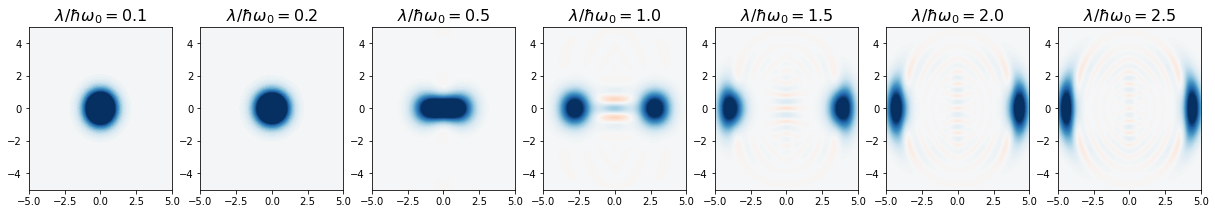

In [10]:
xvec = np.linspace(-5,5,200)
fig, axes = plt.subplots(1,len(g_list), sharex=True, figsize=(3*len(g_list),3))

for idx, psi in enumerate(psi_list1):
    # menghitung wigner function
    W = Wigner(psi=psi, xvec=xvec, yvec=xvec)
    
    g_plot = g_list[idx]/(wa)
    # plot wigner function
    axes[idx].contourf(xvec, xvec, W, 100, norm=mpl.colors.Normalize(-.125,.125), cmap=plt.get_cmap('RdBu'))
    axes[idx].set_title(r"$\lambda/\hbar\omega_0 = %.1f$" % g_plot, fontsize=16)
    #plt.savefig('Plot_wigner_g_f2.pdf')

In [11]:
psi_list1 = []
for g in g_list:
    # Hamiltonian total
    H = Hamiltonian(omega_a=wa, omega_m=wc_list[2], g=g, n=N, a=a, sm=sm, rwa=use_rwa)
    gnd_energy, gnd_state = H.groundstate() 
    psi_list1.append(gnd_state)

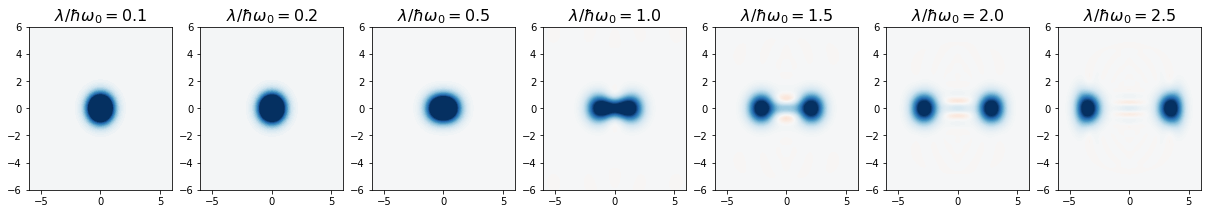

In [12]:
xvec = np.linspace(-6,6,200)
fig, axes = plt.subplots(1,len(g_list), sharex=True, figsize=(3*len(g_list),3))

for idx, psi in enumerate(psi_list1):
    # menghitung wigner function
    W = Wigner(psi=psi, xvec=xvec, yvec=xvec)
    
    g_plot = g_list[idx]/(wa)
    # plot wigner function
    axes[idx].contourf(xvec, xvec, W, 100, norm=mpl.colors.Normalize(-.125,.125), cmap=plt.get_cmap('RdBu'))
    axes[idx].set_title(r"$\lambda/\hbar\omega_0 = %.1f$" % g_plot, fontsize=16)
    #plt.savefig('Plot_wigner_g_f3.pdf')

In [13]:
psi_list1 = []
for g in g_list:
    # Hamiltonian total
    H = Hamiltonian(omega_a=wa, omega_m=wc_list[3], g=g, n=N, a=a, sm=sm, rwa=use_rwa)
    gnd_energy, gnd_state = H.groundstate() 
    psi_list1.append(gnd_state)

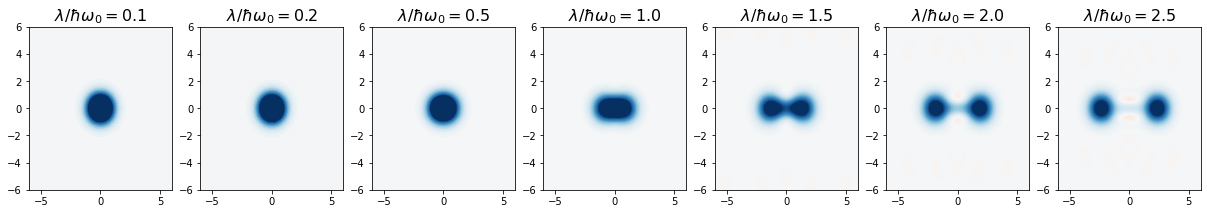

In [14]:
xvec = np.linspace(-6,6,200)
fig, axes = plt.subplots(1,len(g_list), sharex=True, figsize=(3*len(g_list),3))

for idx, psi in enumerate(psi_list1):
    # menghitung wigner function
    W = Wigner(psi=psi, xvec=xvec, yvec=xvec)
    
    g_plot = g_list[idx]/(wa)
    # plot wigner function
    axes[idx].contourf(xvec, xvec, W, 100, norm=mpl.colors.Normalize(-.125,.125), cmap=plt.get_cmap('RdBu'))
    axes[idx].set_title(r"$\lambda/\hbar\omega_0 = %.1f$" % g_plot, fontsize=16)
    #plt.savefig('Plot_wigner_g_f4.pdf')

In [15]:
psi_list1 = []
for g in g_list:
    # Hamiltonian total
    H = Hamiltonian(omega_a=wa, omega_m=wc_list[4], g=g, n=N, a=a, sm=sm, rwa=use_rwa)
    gnd_energy, gnd_state = H.groundstate() 
    psi_list1.append(gnd_state)

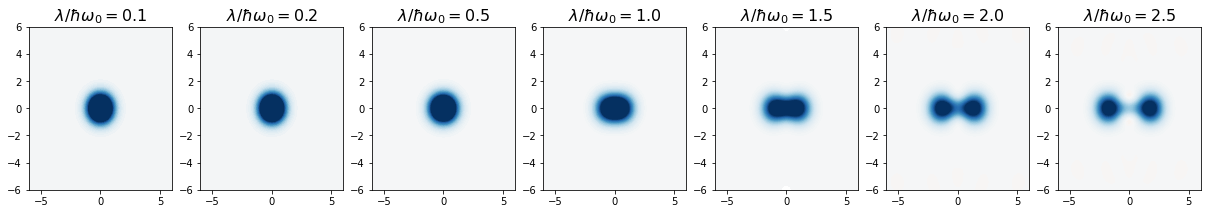

In [16]:
xvec = np.linspace(-6,6,200)
fig, axes = plt.subplots(1,len(g_list), sharex=True, figsize=(3*len(g_list),3))

for idx, psi in enumerate(psi_list1):
    # menghitung wigner function
    W = Wigner(psi=psi, xvec=xvec, yvec=xvec)
    
    g_plot = g_list[idx]/(wa)
    # plot wigner function
    axes[idx].contourf(xvec, xvec, W, 100, norm=mpl.colors.Normalize(-.125,.125), cmap=plt.get_cmap('RdBu'))
    axes[idx].set_title(r"$\lambda/\hbar\omega_0 = %.1f$" % g_plot, fontsize=16)
    #plt.savefig('Plot_wigner_g_f5.pdf')

## Melihat Pengaruhnya Terhadap Entropi

In [17]:
g_list = np.linspace(0, 5, 50)*wa # Kuat interaksi
entropy_list = np.zeros([len(wc_list), len(g_list)])
for i, wc in enumerate(wc_list):
    for j, g in enumerate(g_list):
        # Hitung Hamiltonian
        H = Hamiltonian(omega_a=wa, omega_m=wc, g=g, n=N, a=a, sm=sm, rwa=use_rwa)
        # menghitung ground state & energinya
        _, gnd_state = H.groundstate()
        entropy_list[i,j] = Entropy(gnd_state)
        


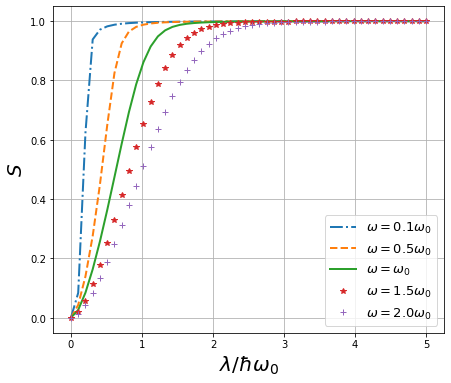

In [18]:
fig, axes = plt.subplots(1, 1, sharex=True, figsize=(7,6))
#axes.set(xlim=(0, 5), ylim=(0, 1.05))
axes.plot(g_list/wa, entropy_list[0], '-.', linewidth=2, label=r"$\omega=0.1\omega_{0}$")
axes.plot(g_list/wa, entropy_list[1], '--', linewidth=2, label=r"$\omega=0.5\omega_{0}$")
axes.plot(g_list/wa, entropy_list[2], '-', linewidth=2, label=r"$\omega=\omega_{0}$")
axes.plot(g_list/wa, entropy_list[3], '*', linewidth=2, label=r"$\omega=1.5\omega_{0}$")
axes.plot(g_list/wa, entropy_list[4], '+', linewidth=2, label=r"$\omega=2.0\omega_{0}$")
axes.legend(loc=0,  fontsize=13)
axes.set_xlabel(r'$\lambda/\hbar\omega_{0}$', fontsize=20)
axes.set_ylabel(r'$S$', fontsize=20)
axes.grid()
#plt.savefig('Plot_Entropi_g_frekuensi medan.pdf')  

## Probabilitas Okupasi

In [19]:
wa = 1.0*2*np.pi # frekuensi eksitasi atom
wc_list = [0.1*wa, 0.5*wa, 1.0*wa, 1.5*wa, 2.0*wa]  # List dari frekuensi medan
N = 15 
use_rwa = False
g_list = np.linspace(0, 5, 50)*wa # Kuat interaksi
tlist = np.linspace(0,30,301)

#oprator
a = tensor(destroy(N), qeye(2))  #operator a
sm = tensor(qeye(N), destroy(2)) #operator sigma-minus

# Keadaan awal
psi_0 = tensor(basis(N,0), basis(2,1)) # keadaan eksitasi
#psi_0 = tensor(basis(N,1), basis(2,0)) # keadaan dasar

In [23]:
P_e = []
P_g = []
for wc in wc_list:
    H = Hamiltonian(omega_a=wa, omega_m=0.01*wc, g=0.5*wa, n=N, a=a, sm=sm, rwa=use_rwa)
    me_result = mesolve(H, psi_0, tlist, [], [sm.dag()*sm, sm*sm.dag()])
    P_e.append(me_result.expect[0])
    P_g.append(me_result.expect[1])
    print(wc)

0.6283185307179586
3.141592653589793
6.283185307179586
9.42477796076938
12.566370614359172


Text(0, 0.5, 'Probabilitas Okupasi')

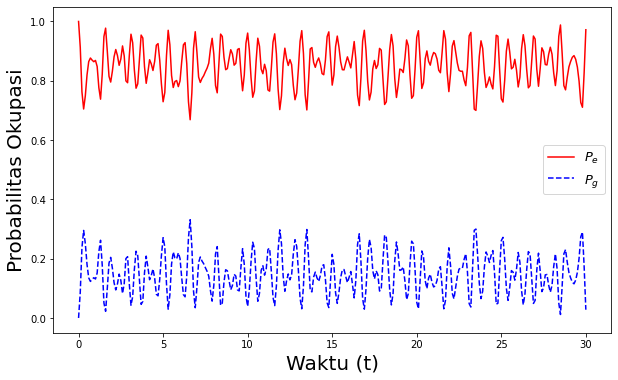

In [24]:
# plot grafik
fig, axes = plt.subplots(1, 1, figsize=(10,6))
axes.plot(tlist, P_e[2],'r-', label=r"$P_{e}$")
axes.plot(tlist, P_g[2], 'b--', label=r"$P_{g}$")
axes.legend(loc=0,  fontsize=13)
axes.set_xlabel('Waktu (t)', fontsize=20)
axes.set_ylabel('Probabilitas Okupasi', fontsize=20)

## Entropi sebagai Fungsi Waktu

Text(0, 0.5, 'Entropi')

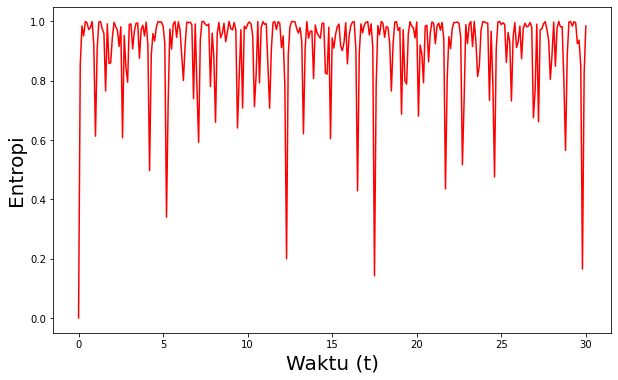

In [25]:
entropi_list = []

H = Hamiltonian(omega_a=wa, omega_m=wc_list[2], g=1*wa, n=N, a=a, sm=sm, rwa=use_rwa)
me_result = mesolve(H, psi_0, tlist, [], [])
psi_list = me_result.states
for idx, psi in enumerate(psi_list):
    rhoo = ptrace(psi, 1)
    entropi_list.append(entropy_vn(rhoo, 2))
fig, axes = plt.subplots(1, 1, figsize=(10,6))
axes.plot(tlist, entropi_list, '-r')
axes.set_xlabel('Waktu (t)', fontsize=20)
axes.set_ylabel('Entropi', fontsize=20)